# European Rich List Database (ERLDB) Analysis

This notebook analyzes the wealth distribution from the ERLDB dataset (`erldb_dib_0422.csv`). We will:
- Load and explore the dataset
- Visualize the top wealth ranks by year
- Analyze trends and distribution

**Configuration**: Change the `COUNTRY` variable in the first code cell to analyze a different country.

In [9]:
# Load ERLDB data and required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Configuration: Change this to analyze a different country
COUNTRY = 'Belgium'

erldb_path = 'datasets/erldb_dib_0422.csv'
erldb = pd.read_csv(erldb_path)
erldb.head()

,Country,ISO,Year,Rank,Wealth,Currency,InEuro,ExRate,Source
0,Austria,AT,2016,1,3.540000e+10,EUR,3.540000e+10,NaN,Trend
1,Austria,AT,2016,2,8.250000e+09,EUR,8.250000e+09,NaN,Trend
2,Austria,AT,2016,3,7.350000e+09,EUR,7.350000e+09,NaN,Trend
3,Austria,AT,2016,4,5.400000e+09,EUR,5.400000e+09,NaN,Trend
4,Austria,AT,2016,5,4.900000e+09,EUR,4.900000e+09,NaN,Trend


## Understanding the Data

**What does "Rank" mean?**

In the ERLDB dataset, **Rank** represents the wealth ranking position of individuals within a country for a given year:

- **Rank 1** = The wealthiest person in that country for that year
- **Rank 2** = The second wealthiest person
- **Rank 3** = The third wealthiest person
- And so on...

For example:
- Austria, 2021, Rank 1: €51.1 billion (the richest person in Austria in 2021)
- Austria, 2021, Rank 2: €16.4 billion (the second richest)
- Austria, 2021, Rank 3: €9.4 billion (the third richest)

The dataset tracks the top 100 wealthiest individuals in each country across multiple years, allowing us to:
1. See how individual wealth positions change over time
2. Analyze wealth concentration (how much the top 10 or top 20 hold compared to others)
3. Track trends in wealth accumulation among the ultra-wealthy

## Wealth Distribution by Rank and Year

Visualize the top 10 wealth ranks for each year in the dataset.

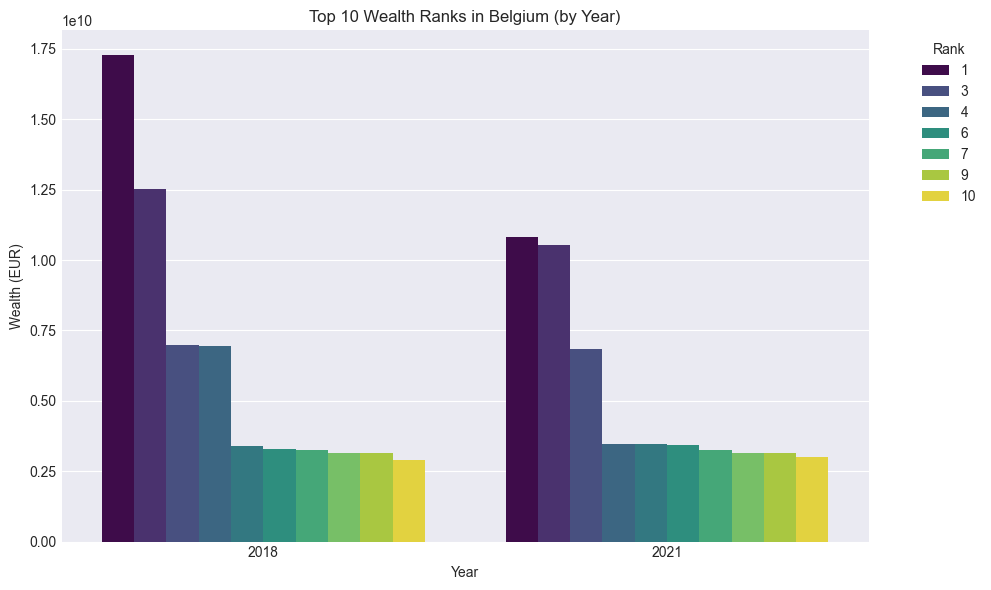

In [10]:
# Filter for selected country and top 10 ranks per year
country_data = erldb[erldb['Country'] == COUNTRY]
top10 = country_data[country_data['Rank'] <= 10]
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Year', y='Wealth', hue='Rank', palette='viridis')
plt.title(f'Top 10 Wealth Ranks in {COUNTRY} (by Year)')
plt.ylabel('Wealth (EUR)')
plt.xlabel('Year')
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Wealth Distribution Trend

Analyze the total wealth of the top 10 ranks over the years.

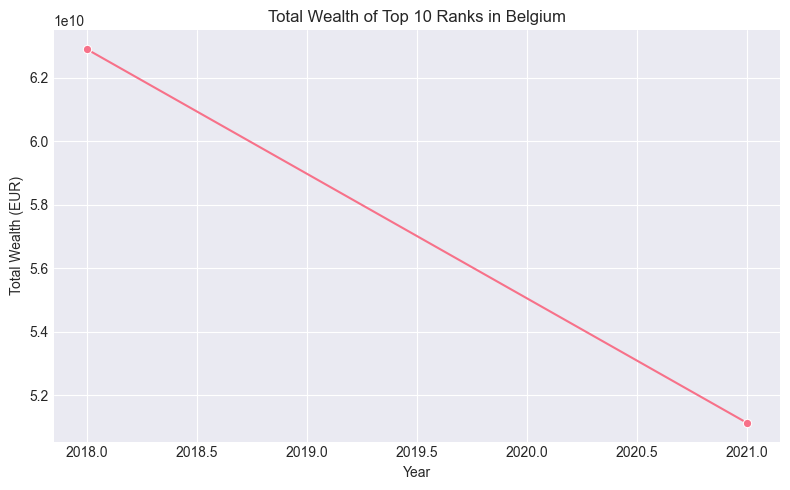

In [11]:
# Aggregate total wealth of top 10 ranks per year
trend = top10.groupby('Year')['Wealth'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=trend, x='Year', y='Wealth', marker='o')
plt.title(f'Total Wealth of Top 10 Ranks in {COUNTRY}')
plt.ylabel('Total Wealth (EUR)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## Wealth Distribution by Rank (Latest Year)

Visualize the wealth distribution for the top 20 ranks in the most recent year available.

/var/folders/j_/z3frgghj5md51_lh9ct4748w0000gn/T/ipykernel_4604/141194684.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20_latest, x='Rank', y='Wealth', palette='mako')


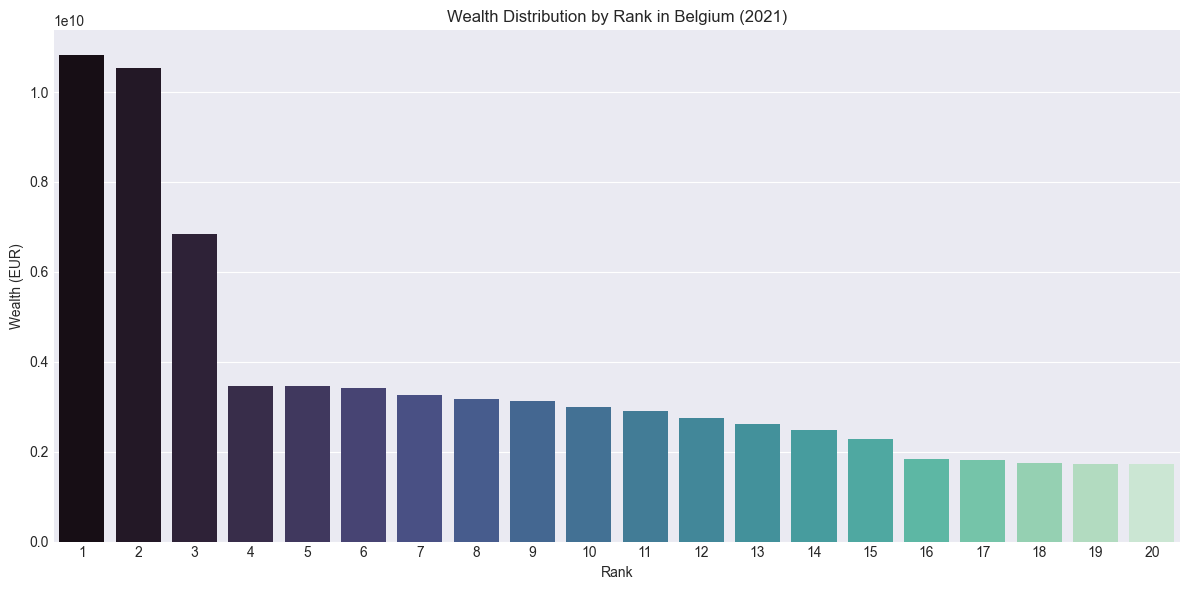

In [12]:
# Wealth distribution for top 20 ranks in the latest year
latest_year = country_data['Year'].max()
top20_latest = country_data[(country_data['Year'] == latest_year) & (country_data['Rank'] <= 20)]
plt.figure(figsize=(12,6))
sns.barplot(data=top20_latest, x='Rank', y='Wealth', palette='mako')
plt.title(f'Wealth Distribution by Rank in {COUNTRY} ({latest_year})')
plt.ylabel('Wealth (EUR)')
plt.xlabel('Rank')
plt.tight_layout()
plt.show()